In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
!pip install --upgrade xlrd #colab bug verson xlrd
!pip install geopandas
!pip install pandas fiona shapely pyproj rtree
!pip install contextily
!pip install pygeos
!pip install topojson
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
#!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
#!pip install git+https://github.com/inseefrlab/cartiflette@80b8a5a28371feb6df31d55bcc2617948a5f9b1a

In [2]:
eff = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')

In [3]:
len(eff['patho_niv1'].unique())


18

In [4]:
data_pollution = pd.read_csv("base_pollution.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [5]:
pollution_group_dep = pd.read_csv("pollution_group_dep.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [6]:
pollution_group_reg = pd.read_csv("pollution_group_reg.csv", sep = ",", encoding = 'utf-8', engine = 'python')

In [7]:
x = input("Entrer un numéro de département (mettre un 0 devant si c'est un chiffre) : ")

Entrer un numéro de département (mettre un 0 devant si c'est un chiffre) :  29


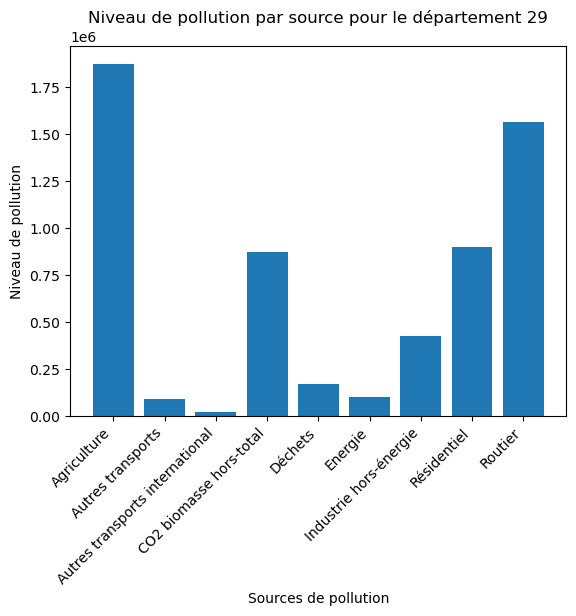

In [8]:
# Sélectionnez les données pour le département x
pollution_dep_91 = pollution_group_dep[pollution_group_dep['DEP'] == x]

# Sélectionnez les colonnes correspondant aux sources de pollution
sources_pollution = pollution_dep_91.columns[1:10]

# Créez un diagramme en barres
plt.bar(sources_pollution, pollution_dep_91.iloc[0, 1:10])
plt.xlabel('Sources de pollution')
plt.ylabel('Niveau de pollution')
plt.title('Niveau de pollution par source pour le département {}'.format(x))
plt.xticks(rotation=45, ha='right')

plt.show()


In [9]:
#Pa rapport aux autres histogramme ici on va prendre pathoniv2 pour les dummies 
base_grande = pd.read_csv("effectifs.csv", sep = ";", encoding = 'utf-8', engine = 'python')
base_grande.shape
base_grande = base_grande.dropna()
base_grande = pd.get_dummies(base_grande, prefix = 'indicatrice_', columns=['patho_niv2'], dtype='int')


liste_var = base_grande.columns[17:]
liste_bis = []
for i in liste_var : 
    liste_bis.append(i)
indicatrice_patho_niv1 = liste_bis

liste_auxil = base_grande['cla_age_5'].unique()
inter_excl = ('95et+', 'tsage', np.nan)

inter_def = []
for i in liste_auxil :
    if i in inter_excl : 
        inter_def = inter_def
    else : 
        inter_def.append(i)
classe_age = []
for i in base_grande['cla_age_5'] : 
    if i in inter_def :
        temp = i.split('-')
        temp[0] = int(temp[0])
        temp[1] = int(temp[1])
        age = (temp[1] + temp[0])/2
    elif i == 'tsage' : 
        age = np.nan
    elif i == '95et+' : 
        age = 100
    else : 
        age = np.nan
    classe_age.append(age)
base_grande.loc[:,'classe_age'] = classe_age

In [11]:
#On supprime les espaces dans le noms des colonnes 
base_grande.columns = base_grande.columns.str.replace(' ', '_')

In [16]:
#On recréer un base similaire auxx base de statdesc
model_prostate = base_grande[['dept', 'classe_age','indicatrice__Cancer_de_la_prostate','sexe','region']]
model_prostate

,dept,classe_age,indicatrice__Cancer_de_la_prostate,sexe,region
0,971,82.0,0,1.0,1
1,973,82.0,0,1.0,3
2,999,82.0,0,1.0,4
3,999,82.0,0,1.0,6
4,75,82.0,0,1.0,11
...,...,...,...,...,...
4057196,34,22.0,0,9.0,76
4057197,46,22.0,0,9.0,76
4057198,81,22.0,0,9.0,76
4057199,82,22.0,0,9.0,76


In [17]:
compte_dept_29 = 0

for index, row in model_prostate.iterrows():
    if row['dept'] == '29':
        compte_dept_29 += 1

print("Nombre d'individus avec dept=='29' :", compte_dept_29)

#Ce code nous donne le nombre d'individus en provenance du Finistère à savoir 18467

Nombre d'individus avec dept=='29' : 18467


In [ ]:
compte_prostate = 0

# Supposons que model_prostate soit votre DataFrame
# Remplacez-le par le nom de votre DataFrame
for index, row in model_prostate.iterrows():
    if row['dept'] == '29' and row['indicatrice__Cancer_de_la_prostate'] == 1:
        compte_prostate += 1

print("Nombre d'individus avec dept=='29' et indicatrice__Cancer_de_la_prostate==1 :", compte_prostate)

#Ce code nous donne le nombre d'individus en provenance du Finistère et qui sont atteints d'un cancer de la prostate 